In this notebook we are going to try and explore the various data preprocessing features provided in the scikit-learn library.

In [55]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
y = y.to_numpy()

In [84]:
# sns.pairplot(X, kind='scatter')
X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [58]:
# Regressor selection
regressor = RandomForestRegressor()

In [59]:
numerical_columns = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
categorical_columns = ['sex']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(), categorical_columns)], remainder='passthrough')

x_pipeline = make_pipeline(preprocessor)

X_transformed = x_pipeline.fit_transform(X)

In [60]:
model = TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor', preprocessor), ('regressor', regressor)]), func=np.log, inverse_func=np.exp)
model.fit(X_train, y_train)


TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['age',
                                                                                        'bmi',
                                                                                        'bp',
                                                                                        's1',
                                                                                        's2',
                                                                                        's3',
                                                                                        's4',
                                                                                        's5',
                                                                                        's6']),
                                                                                      ('cat',
                                                                                       OneHotEncoder(),
                                                                                       ['sex'])])),
                                                     ('regressor',
                                                      RandomForestRegressor())]))

In [61]:
predictions = model.predict(X_test)

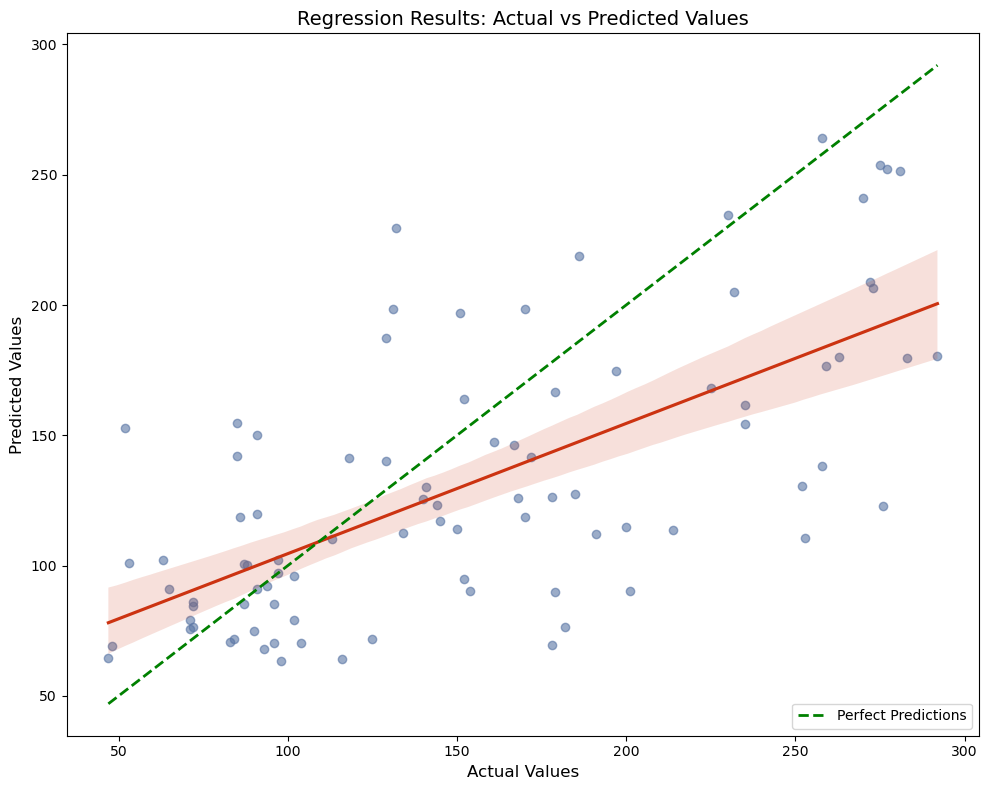

In [62]:
plt.figure(figsize=(10, 8))

ax = sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.6, 'color':'#5975A4'}, line_kws={'color':'#CC3311'})

# Add identity line (perfect predictions)
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
ax.plot([min_val, max_val], [min_val, max_val], 'g--', linewidth=2, label='Perfect Predictions')

# Customize labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Regression Results: Actual vs Predicted Values', fontsize=14)

# Add legend
plt.legend(loc='lower right')

# Tight layout to ensure proper spacing
plt.tight_layout()

# Show the plot
plt.show()